### Immporting the required modules

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings             
awarnings.filterwarnings("ignore")

### Descriptive Analytics

In [3]:
# Reading CSV file

data = pd.read_csv("F:/1AMOD/Courses/Data Science with Python 5460/Assignment 2/GlobalLandTemperaturesByMajorCity.csv" , parse_dates=["dt"])
print("*****Length of our dataset*****")
print(data.shape)
print("\n")
print("*****Sample Data*****")
print(data.head())
print("\n")

*****Length of our dataset*****
(239177, 7)


*****Sample Data*****
          dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  




In [4]:
# Assuming missing values are insignificant in the dataset and dropping them
data.dropna(inplace=True)
print("*****Length of our dataset after dropping the missing values*****")
print(data.shape)
print("\n")

*****Length of our dataset after dropping the missing values*****
(228175, 7)




As greenhouse gas emissions blanket the Earth, they trap the sun’s heat. This leads to global warming and climate change. The world is now warming faster than at any point in recorded history.
The focus of this analysis is to show the effects of global warming on major cities of the world and its impact on the temperature. Relevant findings from the dataset are depicted using multiple visualizations.
I performed descriptive analytics on the dataset and answered the following questions:
1. What are the hottest major cities in the world?
2. What are the coldest major cities in the world?
3. Hottest and Coldest months in Toronto.
4. Average Temperatures per month in Montreal.

*****CANADA DATA*****                dt  AverageTemperature  AverageTemperatureUncertainty  \
151957 1743-11-01              -1.854                          1.734   
151962 1744-04-01               5.164                          2.209   
151963 1744-05-01              12.306                          1.541   
151964 1744-06-01              18.401                          1.460   
151965 1744-07-01              19.320                          1.331   

            City Latitude Longitude  Month  
151957  Montreal   45.81N    72.69W     11  
151962  Montreal   45.81N    72.69W      4  
151963  Montreal   45.81N    72.69W      5  
151964  Montreal   45.81N    72.69W      6  
151965  Montreal   45.81N    72.69W      7  


*****TORONTO DATA***** 
                dt  AverageTemperature  AverageTemperatureUncertainty  Month
229690 1743-11-01              -0.106                          1.905     11
229695 1744-04-01               5.892                          2.249      4
229696 1744-05-01   

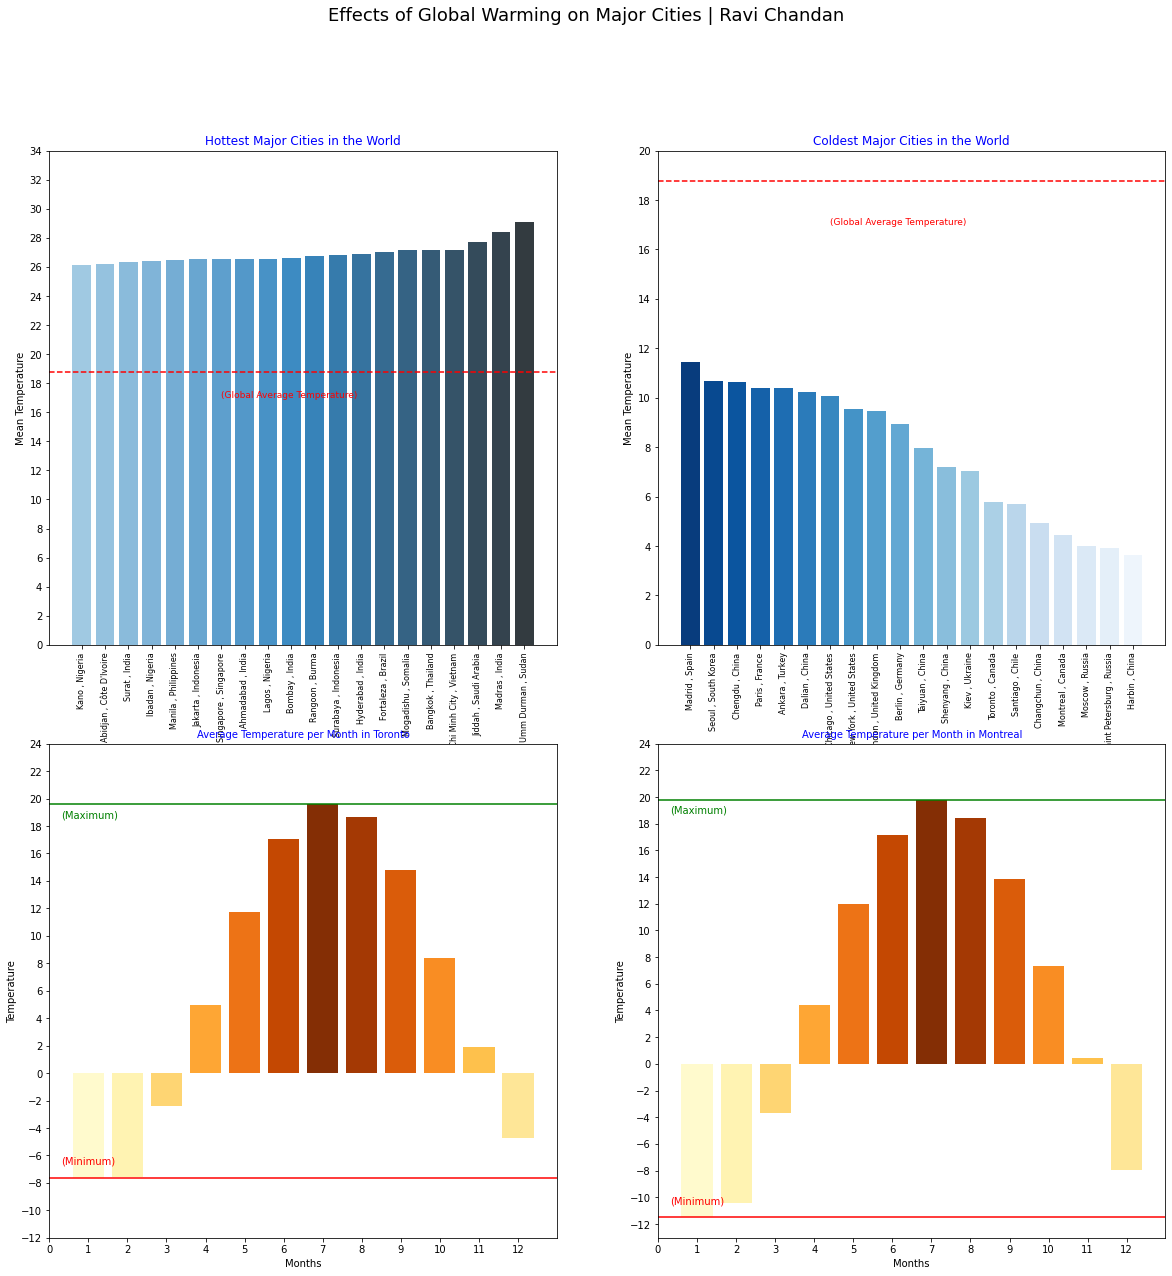

In [9]:
# Subplots

fig = plt.figure(figsize=(20,20))
fig.tight_layout(pad=3)
fig.suptitle('Effects of Global Warming on Major Cities | Ravi Chandan ', fontsize = 18)

# Plot 1 : Hottest Cities in the world with global average temperature

ax1 = plt.subplot(2,2,1)
plt.bar(hottest_index , hottest.values[:,0], color=sns.color_palette("Blues_d", len(hottest)))     
plt.axhline(y=temp["AverageTemperature"].mean() , color="red" , linestyle="--")
plt.yticks(np.arange(0,35,2))
plt.xticks(rotation=90,size=8)
#plt.xlabel("City")
plt.ylabel("Mean Temperature")
ax1.set_title("Hottest Major Cities in the World", fontsize=12, color="blue")
plt.text(6,17,"(Global Average Temperature)" , color="red" , fontsize=9)

# Plot 2 : Coldest Cities in the world with global average temperature

ax2 = plt.subplot(2,2,2)
plt.bar(coldest_index , coldest.values[:,0], color=sns.color_palette("Blues_r" , len(coldest)))
plt.axhline(y=temp["AverageTemperature"].mean() , color="red" , linestyle="--")
plt.yticks(np.arange(0,21,2))
plt.xticks(rotation=90,size=8)
#plt.xlabel("City")
plt.ylabel("Mean Temperature")
ax2.set_title("Coldest Major Cities in the World", fontsize=12, color="blue")
plt.text(6,17,"(Global Average Temperature)" , color="red" , fontsize=9)


# Analysis on Canada's Climate

canada_data = data[data["Country"] == "Canada"]
canada_data["Month"] = pd.DatetimeIndex(canada_data["dt"]).month
canada_data.drop(columns=["Country"] , axis=1 , inplace=True)
print("*****CANADA DATA*****", canada_data.head(5))
print("\n")

# Highlights about the climate in Canada

canada_data["AverageTemperature"].describe()


# Removing Latitude and Longitude columns from Toronto data

toronto = canada_data[canada_data["City"] == "Toronto"]
toronto.drop(columns=["City" , "Latitude" , "Longitude"] , axis=1 , inplace=True)
print("*****TORONTO DATA***** \n",toronto.head(5))
print("\n")

# Removing data before the year 1900 to reduce uncertainity

toronto = toronto[toronto["dt"] >=  pd.Timestamp('1900-01-01 00:00:00')]

# Finding hottest and coldest months in Toronto

temp_tor = toronto.groupby(["Month"]).mean()
temp_tor = temp_tor.sort_values(["AverageTemperature"])

# Plot 3: Average Temperature per each month in Toronto

ax3 = plt.subplot(2,2,3)
plt.bar(temp_tor.index , temp_tor["AverageTemperature"].values , color=sns.color_palette("YlOrBr",len(temp_tor.index) ))
plt.axhline(y=temp_tor["AverageTemperature"].values.min() , color="red")
plt.text(.3,temp_tor["AverageTemperature"].values.min()+1 , "(Minimum)" , color='red')
plt.axhline(y=temp_tor["AverageTemperature"].values.max() , color="green")
plt.text(.3,temp_tor["AverageTemperature"].values.max()-1 , "(Maximum)" , color='green')
xticks = plt.xticks(range(13))
yticks = plt.yticks(np.arange(-12 ,25 ,2))
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.title("Average Temperature per Month in Toronto" , fontsize=10, color="blue")

# Removing Latitude and Longitude columns from Toronto

montreal = canada_data[canada_data["City"] == "Montreal"]
montreal.drop(columns=["City" , "Latitude" , "Longitude"] , axis=1 , inplace=True)
print("*****MONTREAL DATA***** \n",montreal.head(5))
print("\n")

# Removing data before the year 1900 to reduce uncertainity

montreal = montreal[montreal["dt"] >=  pd.Timestamp('1900-01-01 00:00:00')]

# Finding hottest and coldest months in Montreal
temp_mon = montreal.groupby(["Month"]).mean()
temp_mon = temp_mon.sort_values(["AverageTemperature"])

# Plot 4: Average Temperature per each month in Montreal

ax4 = plt.subplot(2,2,4)
plt.bar(temp_mon.index , temp_mon["AverageTemperature"].values , color=sns.color_palette("YlOrBr",len(temp_mon.index) ))
plt.axhline(y=temp_mon["AverageTemperature"].values.min() , color="red")
plt.text(.3,temp_mon["AverageTemperature"].values.min()+1 , "(Minimum)" , color='red')
plt.axhline(y=temp_mon["AverageTemperature"].values.max() , color="green")
plt.text(.3,temp_mon["AverageTemperature"].values.max()-1 , "(Maximum)" , color='green')
xticks = plt.xticks(range(13))
yticks = plt.yticks(np.arange(-12 , 25 ,2))
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.title("Average Temperature per Month in Montreal" , fontsize=10, color="blue")

plt.show()

## Relevant findings from the Visualizations:
    
After loading the dataset and parsing the ‘dt’ column to date stamp, missing values are removed by assuming them to be insignificant. Only the records after the year 1900 are considered to reduce uncertainty.

### Plots 1 & 2: Hottest and Coldest Cities in the World
We can observe that many major cities around the world have an average temperate way greater than the Global Average Temperature line (plotted in red). This is a serious mess as cities are major contributors to climate change. According to UN-Habitat, cities consume 78 per cent of the world's energy and produce more than 60 per cent of greenhouse gas emissions. Yet, they account for less than 2 per cent of the Earth's surface.
While cities having average mean temperatures way higher than the global average temperature are being under the spotlight, cities with temperatures way lower than the global average temperatures are also a dominant concern. We can observe this from plot 2 where the average temperatures in major cities ranging from Madrid, Spain to Harbin, China; have been dropping down which is bothersome.
### Plots 3 and 4: Average Temperatures per each month in Toronto and Montreal
I have tried to study two of the major cities in Canada: Toronto and Montreal. From these plots, we can deduce clearly that January is the coldest month of the year in both cities while July is the hottest. However, the average temperature between both the cities per month varies by a notable margin.
The Average Maximum and Average Minimum are plotted in green and red lines respectively to act as reference lines for observing the magnitude of changes in the temperatures throughout the year.
Changing climates make weather more variable and extreme, making disaster planning and response much more difficult. As our climate changes, we must rethink important aspects of how we live in cities.

## Pre-Attentive Features Usage

Pre-attentive attributes are a very powerful tool in the data visualization toolbox – as they determine what the audience notices first when they look at the visualization. These features are carefully harnessed in the above visualizations to make the user understand what is presented through the design without requiring putting in much effort.

• First and foremost, the colour factor. This can constitute the intensity and hue of the colours used throughout the visualizations. Let’s see how we have made the best use of colours in our plots.

• The super title of the plot is in black and large, clearly stating the purpose of the subplot. In order to distinguish the subplots effectively at first glance, each title is given a different color from black. With four blue titles clearly written for each plot, we can easily figure out that there are four plots.

• Using the blue hue in plots 1 & 2, the hottest and coldest cities around the world are depicted. In plot 1, the thickness of the shade from light to dark indicates a gradual increase in temperature, while in plot 2, it indicates the opposite. To represent average monthly temperatures, shades of orange have been used in plots 3 & 4.

• We have made it easy for viewers to discern the hotter and colder months by shading the hotter months dark and the colder months light.

• The next thing that draws our attention is the dotted line in plots 1 & 2, marked in red. This signifies the Global Average Temperature and acts as a reference line. If this line is marked in any other colour, it wouldn’t be much effective and clear. Similarly, in plots 3 and 4, the maximum average temperature is marked in “green” while the minimum is marked in “red” by which I could drive the user’s attention to the detail.

• An immediate thing a novice viewer does after viewing the visualisation is to compare the lengths of the bars. Length is another important pre-attentive feature and which when used wisely could give compelling results. As we can observe in plot 1, a user can clearly point out that Umm Durman in Sudan is one of the hottest major cities, even without looking at the number on the axis.

• As we look at the spatial positioning of each plot, its title and the super-title are all perfectly aligned with each other. If the margin of a graph on the left side does not align with the one on the right, the visual output will have abstained.

• In plots 1 & 2, the X-axis label has been removed and replaced by city names. These names are positioned vertically to draw the viewer’s attention to the city names precisely. We can observe that no other text in the subplots is positioned in a vertical manner.

By tapping into pre-attentive properties of visualizations we can help users find what they never expected to see.